In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
import seaborn as sns
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from ma2reverse import get_data,Strategy
sns.set_style("darkgrid")

/Users/johnsonhsiao/.pyenv/versions/3.10.13/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [2]:
df_dict = {}
candidate = ['ETH','BTC','BNB','SOL','MATIC',
            'XRP','DYDX','AVAX','LINK','GAS',
            'DOGE','ORDI','TRB','WLD','ADA',
            'OP','FIL','ZRX','LTC','RUNE','ATOM',
            'ARB','GMT','ETC','ARK','BCH','DOT',
            'LDO','SUI','GALA','CAKE',
            'APE','INJ','FTM','APT','YFI','OMG',
            'SEI','EOS','1000SHIB','NEAR',
            'MKR','CYBER','UNI','BLUR','SUSHI','WAVES','MASK','MANA',
            'EGLD','AAVE','NEO','FET','TRX','GRT','ALGO','STX','XLM']
for coin in candidate:
    # pair = coin + 'USDT'
    df_dict[coin] = get_data(coin)

In [5]:
import pickle

with open('my_data.pkl', 'wb') as file:
    pickle.dump(df_dict, file)


In [3]:
data = pd.read_csv('/Users/johnsonhsiao/DC_capital_intern/strategy_research/CTA_TEST/Crypto/ma2reverse/15min/BTC/both_record_df.csv')

{'long_ma': 80, 'short_ma': 48, 'hour': 2, 'sl': 4}
APY: 56.42 %
MDD: 9.06 %
MDD Duration 126 days 10:00:00
worst trade: -4.06 %
2022-05-14 22:45:00 ~ 2022-05-15 22:00:00
avg holding days: 0.90 days
--------------------------------------------
PF: 2.12
Sharpe Ratio: 1.86
Calmar Ratio: 5.17
Sortino Ratio: 2.66
Omega Ratio: 1.08
--------------------------------------------
Expectancy : 0.96 %
Total Time Exposure : 14.51 %
Total Trades: 111
Win Rate: 70.27 %
--------------------------------------------
PF * Win Rate: 1.486


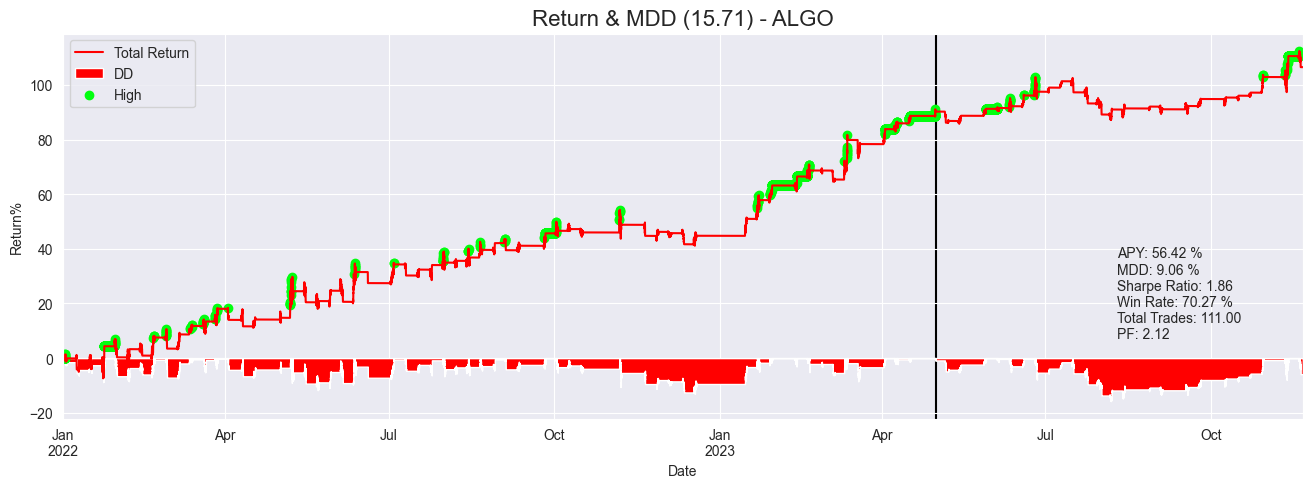

{'long_ma': 96, 'short_ma': 32, 'hour': 2, 'sl': 5}
APY: 89.93 %
MDD: 12.89 %
MDD Duration 78 days 07:45:00
worst trade: -5.06 %
2022-06-19 09:15:00 ~ 2022-06-19 18:45:00
avg holding days: 1.00 days
--------------------------------------------
PF: 2.82
Sharpe Ratio: 2.22
Calmar Ratio: 5.36
Sortino Ratio: 3.18
Omega Ratio: 1.09
--------------------------------------------
Expectancy : 1.23 %
Total Time Exposure : 19.97 %
Total Trades: 138
Win Rate: 72.46 %
--------------------------------------------
PF * Win Rate: 2.046


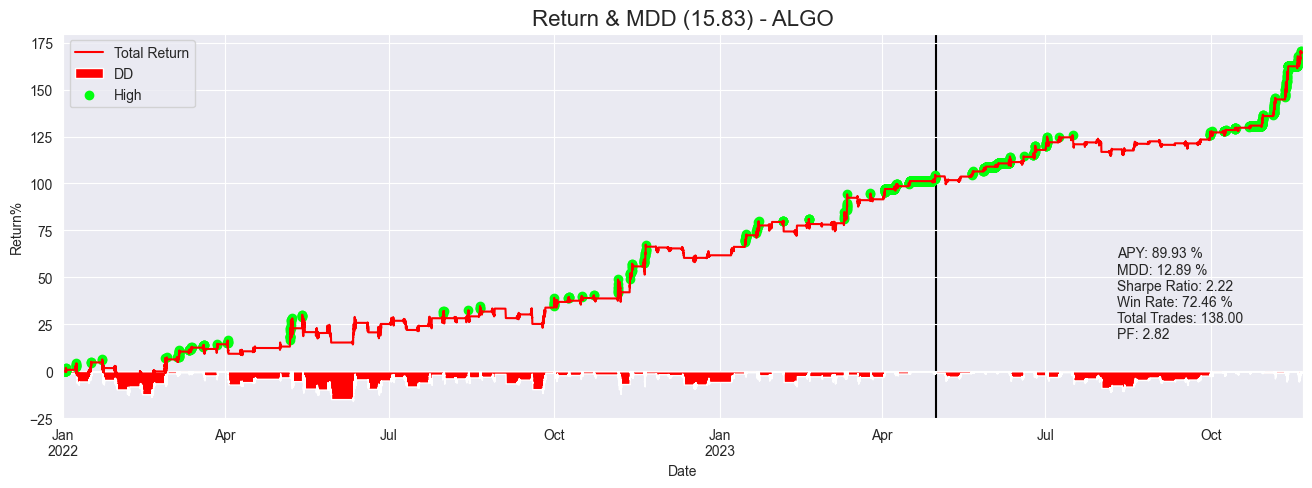

{'long_ma': 76, 'short_ma': 56, 'hour': 2, 'sl': 5}
APY: 59.65 %
MDD: 11.52 %
MDD Duration 119 days 04:30:00
worst trade: -5.06 %
2022-05-14 22:45:00 ~ 2022-05-15 22:00:00
avg holding days: 1.03 days
--------------------------------------------
PF: 2.29
Sharpe Ratio: 2.00
Calmar Ratio: 4.26
Sortino Ratio: 2.88
Omega Ratio: 1.09
--------------------------------------------
Expectancy : 1.14 %
Total Time Exposure : 14.80 %
Total Trades: 99
Win Rate: 75.76 %
--------------------------------------------
PF * Win Rate: 1.736


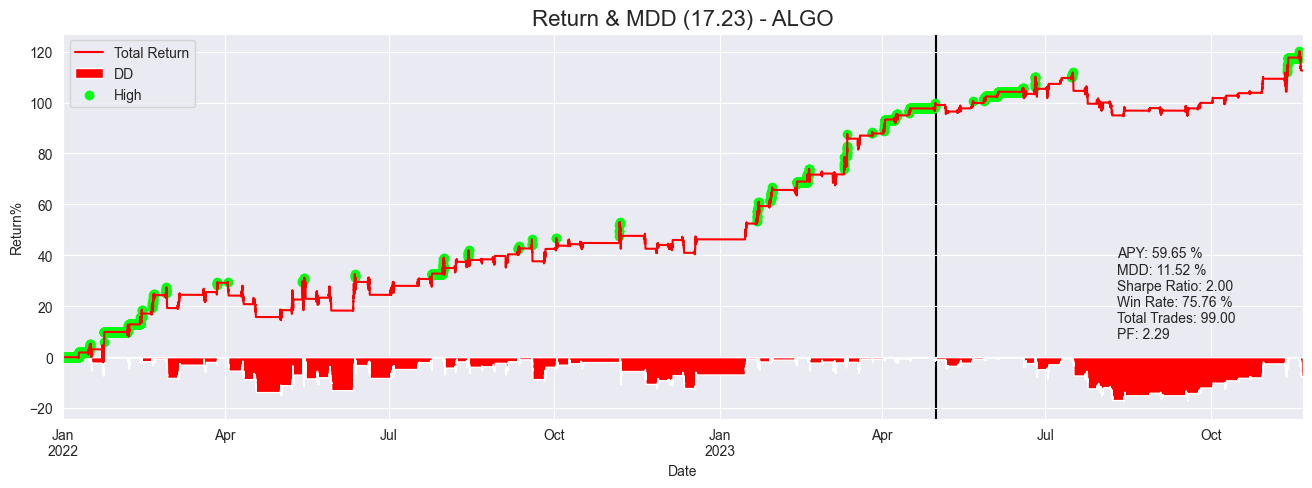

{'long_ma': 72, 'short_ma': 56, 'hour': 2, 'sl': 5}
APY: 53.03 %
MDD: 13.43 %
MDD Duration 119 days 19:30:00
worst trade: -5.06 %
2022-05-14 22:45:00 ~ 2022-05-15 22:00:00
avg holding days: 0.95 days
--------------------------------------------
PF: 2.07
Sharpe Ratio: 1.76
Calmar Ratio: 3.31
Sortino Ratio: 2.51
Omega Ratio: 1.08
--------------------------------------------
Expectancy : 1.01 %
Total Time Exposure : 13.65 %
Total Trades: 99
Win Rate: 71.72 %
--------------------------------------------
PF * Win Rate: 1.486


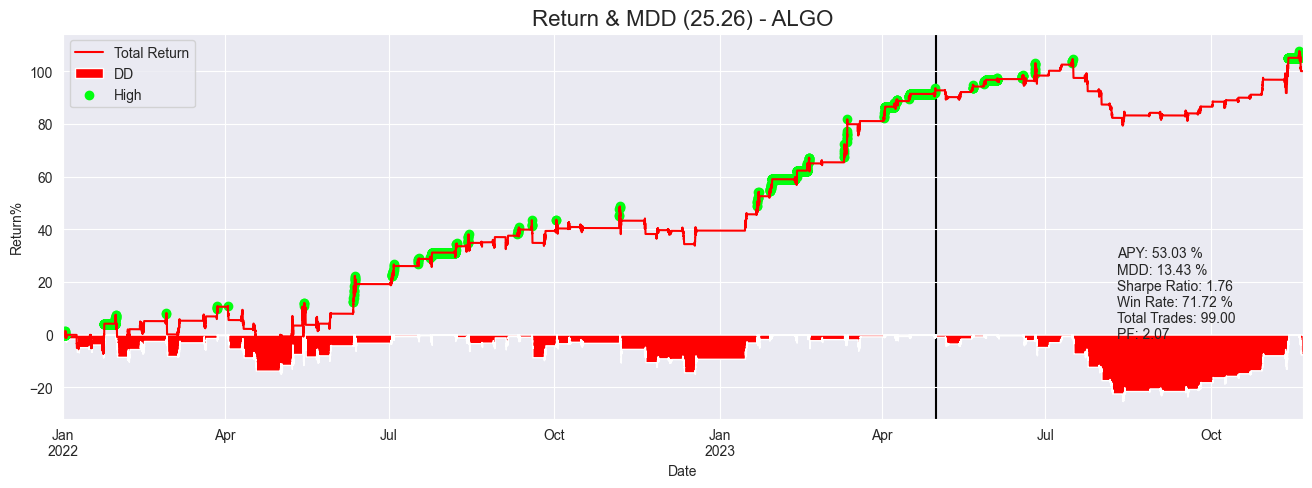

{'long_ma': 80, 'short_ma': 48, 'hour': 2, 'sl': 5}
APY: 54.36 %
MDD: 10.10 %
MDD Duration 139 days 22:30:00
worst trade: -5.06 %
2022-05-14 22:45:00 ~ 2022-05-15 22:00:00
avg holding days: 0.95 days
--------------------------------------------
PF: 2.02
Sharpe Ratio: 1.75
Calmar Ratio: 4.49
Sortino Ratio: 2.51
Omega Ratio: 1.08
--------------------------------------------
Expectancy : 0.93 %
Total Time Exposure : 15.23 %
Total Trades: 110
Win Rate: 71.82 %
--------------------------------------------
PF * Win Rate: 1.451


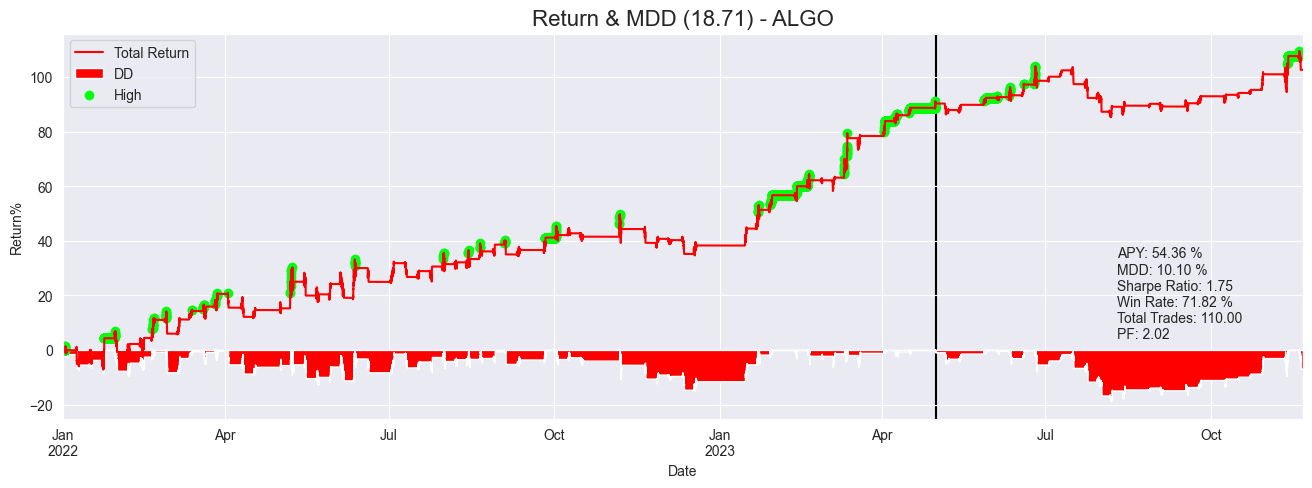

{'long_ma': 88, 'short_ma': 36, 'hour': 2, 'sl': 5}
APY: 80.21 %
MDD: 16.62 %
MDD Duration 146 days 15:15:00
worst trade: -5.06 %
2022-06-19 09:15:00 ~ 2022-06-19 18:45:00
avg holding days: 1.05 days
--------------------------------------------
PF: 2.62
Sharpe Ratio: 2.07
Calmar Ratio: 3.79
Sortino Ratio: 2.98
Omega Ratio: 1.08
--------------------------------------------
Expectancy : 1.17 %
Total Time Exposure : 19.70 %
Total Trades: 129
Win Rate: 75.97 %
--------------------------------------------
PF * Win Rate: 1.988


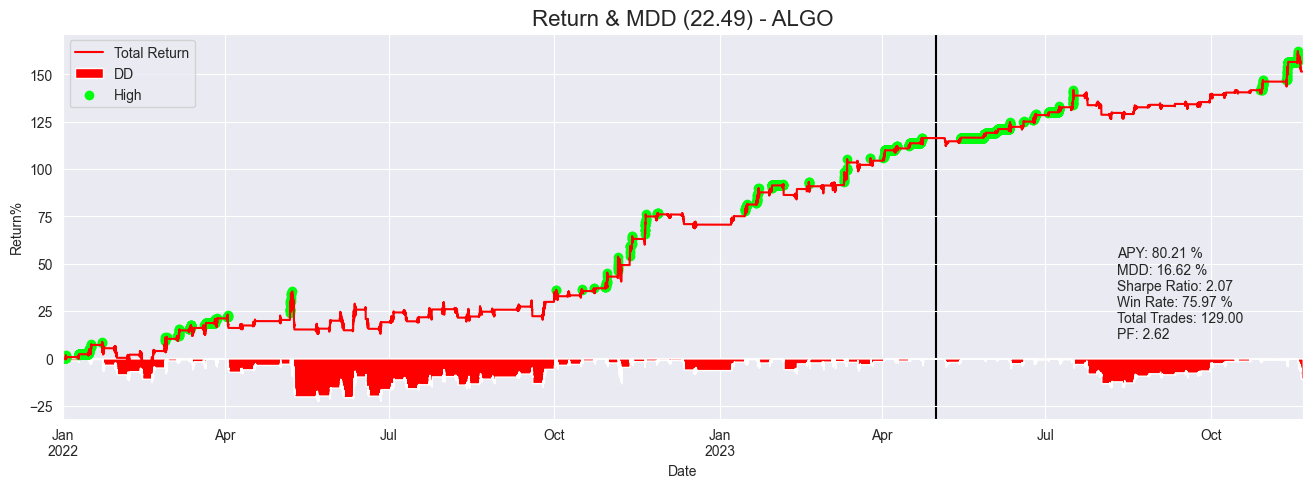

{'long_ma': 108, 'short_ma': 36, 'hour': 2, 'sl': 4}
APY: 53.26 %
MDD: 10.54 %
MDD Duration 251 days 18:00:00
worst trade: -4.06 %
2022-06-19 09:15:00 ~ 2022-06-19 10:30:00
avg holding days: 1.07 days
--------------------------------------------
PF: 1.91
Sharpe Ratio: 1.74
Calmar Ratio: 4.23
Sortino Ratio: 2.51
Omega Ratio: 1.07
--------------------------------------------
Expectancy : 0.82 %
Total Time Exposure : 18.92 %
Total Trades: 122
Win Rate: 69.67 %
--------------------------------------------
PF * Win Rate: 1.332


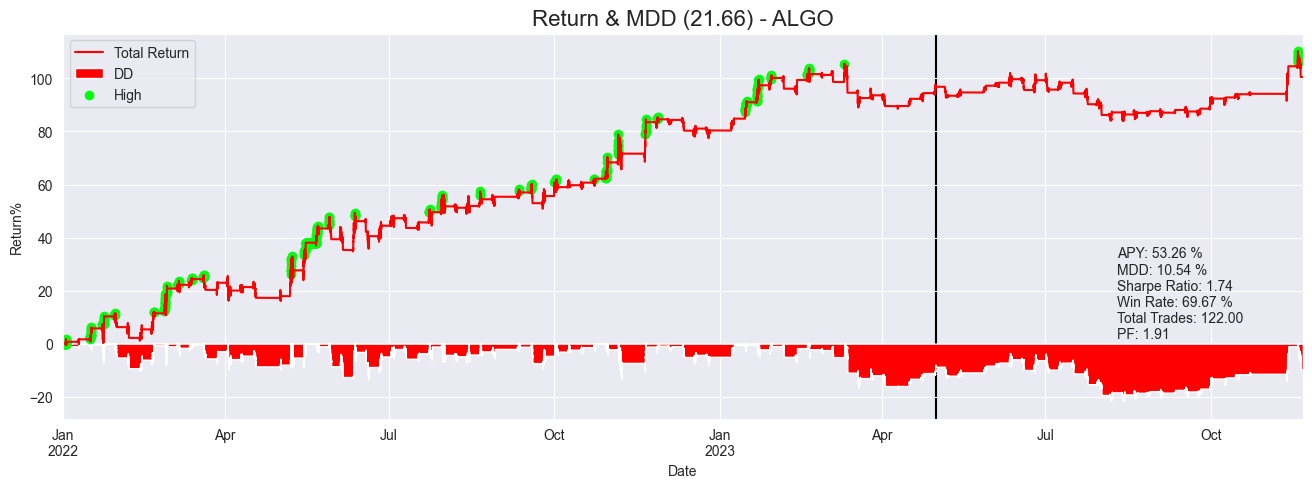

{'long_ma': 44, 'short_ma': 20, 'hour': 2, 'sl': 5}
APY: 65.41 %
MDD: 14.63 %
MDD Duration 132 days 20:00:00
worst trade: -5.06 %
2022-05-14 17:15:00 ~ 2022-05-14 22:45:00
avg holding days: 0.84 days
--------------------------------------------
PF: 2.05
Sharpe Ratio: 1.70
Calmar Ratio: 3.63
Sortino Ratio: 2.46
Omega Ratio: 1.07
--------------------------------------------
Expectancy : 0.76 %
Total Time Exposure : 19.96 %
Total Trades: 163
Win Rate: 66.26 %
--------------------------------------------
PF * Win Rate: 1.356


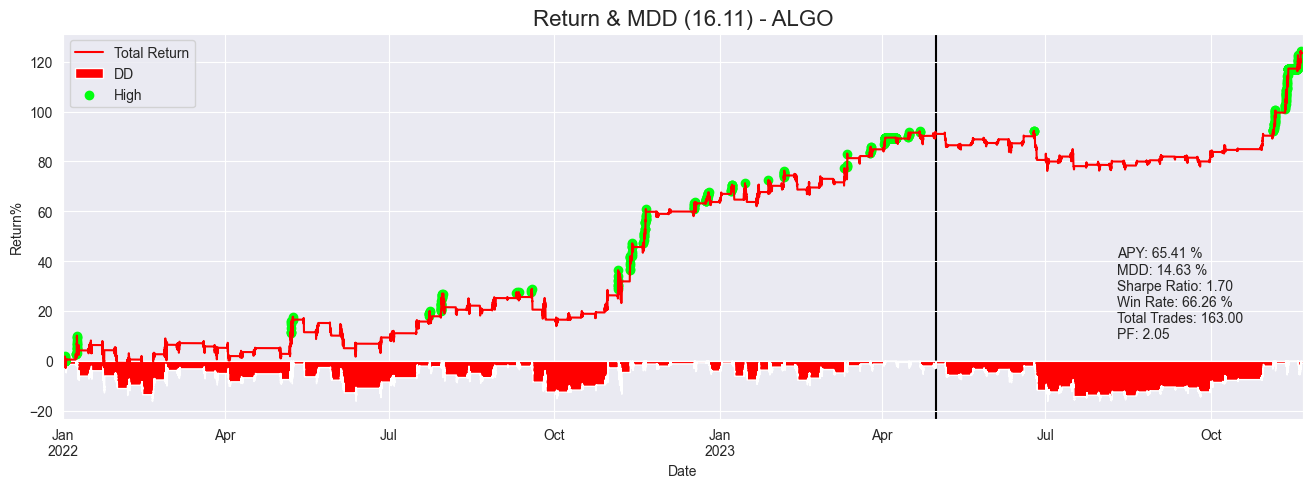

{'long_ma': 100, 'short_ma': 36, 'hour': 2, 'sl': 5}
APY: 75.13 %
MDD: 10.11 %
MDD Duration 105 days 04:30:00
worst trade: -5.06 %
2022-05-29 10:00:00 ~ 2022-05-30 01:30:00
avg holding days: 1.09 days
--------------------------------------------
PF: 2.57
Sharpe Ratio: 2.07
Calmar Ratio: 5.90
Sortino Ratio: 2.99
Omega Ratio: 1.08
--------------------------------------------
Expectancy : 1.13 %
Total Time Exposure : 19.97 %
Total Trades: 126
Win Rate: 75.40 %
--------------------------------------------
PF * Win Rate: 1.938


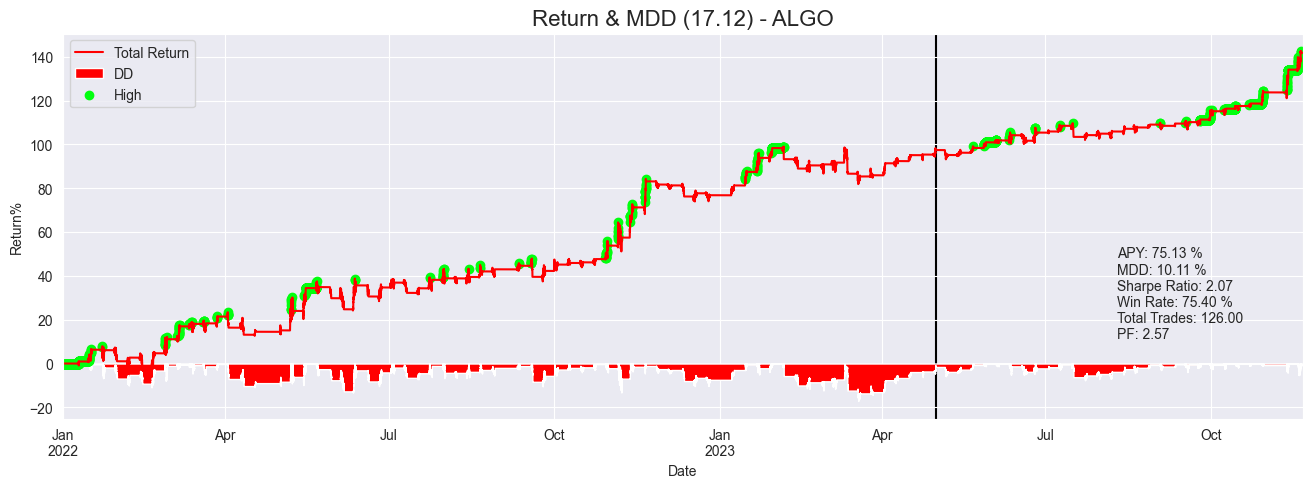

{'long_ma': 20, 'short_ma': 24, 'hour': 2, 'sl': 5}
APY: 44.08 %
MDD: 17.09 %
MDD Duration 258 days 18:00:00
worst trade: -5.06 %
2022-05-29 08:30:00 ~ 2022-05-30 01:15:00
avg holding days: 0.87 days
--------------------------------------------
PF: 1.65
Sharpe Ratio: 1.50
Calmar Ratio: 2.21
Sortino Ratio: 2.16
Omega Ratio: 1.06
--------------------------------------------
Expectancy : 0.57 %
Total Time Exposure : 18.59 %
Total Trades: 147
Win Rate: 65.31 %
--------------------------------------------
PF * Win Rate: 1.076


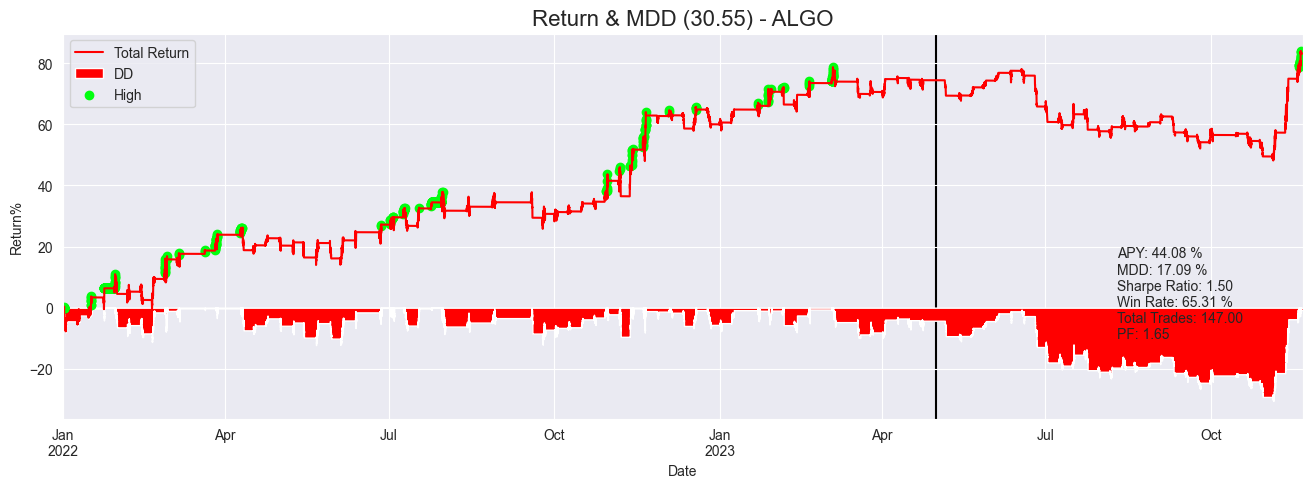

In [15]:
start = '2022-01-01'
sep = ''
end = ''

coin = 'ALGO'
data = pd.read_csv(f'/Users/johnsonhsiao/DC_capital_intern/strategy_research/CTA_TEST/Crypto/ma2reverse/15min/{coin}/both_record_df.csv')
side = 'both'
config = {'freq':'15min', 'lag':1, 'fee': 0.0003, 'weekend_filter':False}
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)

for i in range(10):
    i += 10
    params = eval(data['params'].iloc[i])
    print(params)
                    
    _pf = strategy.strategy(side = side,params=params)
    trades = _pf.trades.records_readable
    analyze = Analyzer(strategy)
    # analyze.show_period_analysis(trades)
    value = analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])

In [2]:
import pickle

with open('my_data.pkl', 'rb') as file:
    df_dict = pickle.load(file)

In [6]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-05-01'

done = os.listdir('./15min/')

# for freq in ['5min','15min','30min']:
for symbol in list(df_dict.keys()):
    if symbol in []:
        continue
    sample_sets = [[start,end]]
    freq = '15min'

    params = {"long_ma":[4,150,4],
            "short_ma":[4,100,4],
            "hour":[2,3,1],
            "sl":[4,6,1]}

    config = {'freq':freq,'fee': 0.0003,'weekend_filter': False}

    try:
        multi_test = MultiTester(
            Strategy,
            get_data_func=get_data,
            params=params,
            config=config,
            symbol_list=[symbol],
            start=start,
            df_dict=df_dict,
            end=end,
            )

        all_params = multi_test.multi_params([symbol],sample_sets,direction='both')
        trades, value_df = multi_test.multi_params_result(all_params)
    except Exception as e:
        print(symbol)


======================= BTC BOTH Optimize Test =======================
Optimization trails: 1776


KeyboardInterrupt: 

In [18]:
import hiplot as hip
df = pd.read_csv('/Users/johnsonhsiao/DC_capital_intern/0502_0802_data_strategy1_trials.csv')
df = df.drop(columns= ['datetime_start','datetime_complete','duration','state','number', 'system_attrs_nsga2:generation'])
hiplot_experiment = hip.Experiment.from_dataframe(df)
hiplot_experiment.display()

<IPython.core.display.Javascript object>